In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


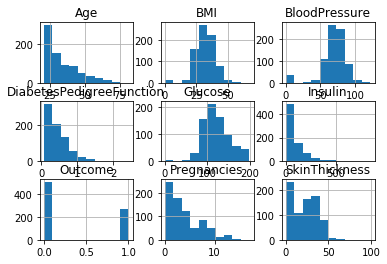

<Figure size 432x216 with 0 Axes>

In [15]:
data.hist()
plt.figure(figsize=(6,3))
plt.show()

## Density Plot


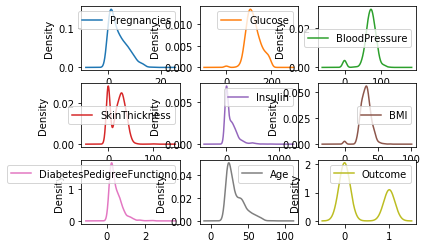

In [11]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

## Box and Whisker Plots

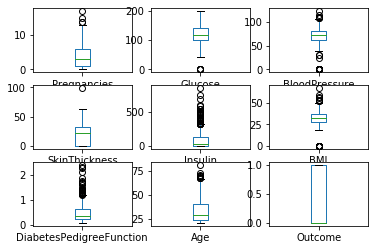

In [10]:
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

## Correlation Matrix Plots


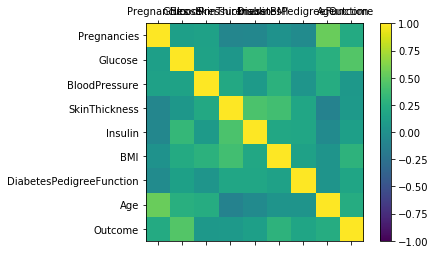

In [18]:
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax =1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(data.columns.values))
ax.set_yticklabels(list(data.columns.values))
plt.show()

### Scatter Plot Matrix

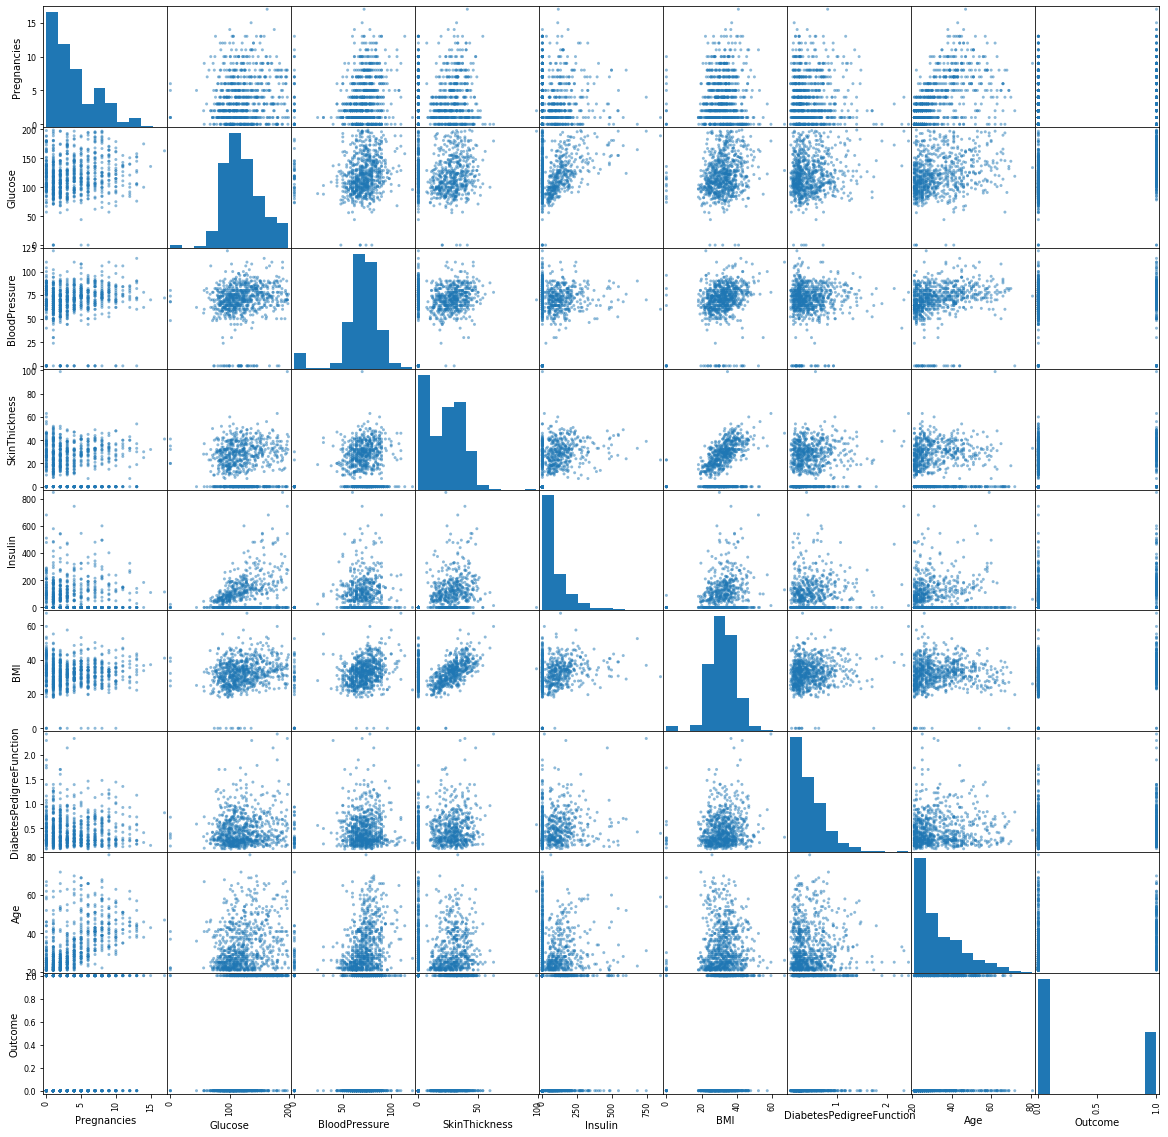

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=[20,20])
plt.show()

## Rescale Data using MinMaxScaler
Useful for:
* Gradient descent
* algos that weight inputs like regression, neural networks
* algos that use distance measures like k-Nearest Neighbours

In [48]:
from sklearn.preprocessing import MinMaxScaler
X = data.values[:,0:8]
Y= data.values[:,8]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data 
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## Standardise Data with StandardScaler: transform attributes with a Gaussian distribution, mean of 0, sd of 1
Useful for:
* algos that assume a Gaussian distribution in the input, such as linear regression, logistic regression, and linear discriminate analysis

In [49]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,0:8]
Y= data.values[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarise transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Normalise Data
* Rescale each row to have a length of 1 (i.e. a vector with the length of 1)
* Useful for sparse datasets (i.e. with a lot of zeros)
* Useful for algos that weights inputs such as neural networks and algos that use distance measures such as KNN

In [57]:
from sklearn.preprocessing import Normalizer
X = data.values[:,0:8]
Y= data.values[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarise transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


## Binarise Data

* Transform all values above a threshold to 1 and all equal or below to 0.
* Useful when you want to add new features

In [56]:
from sklearn.preprocessing import Binarizer

X = data.values[:,0:8]
Y= data.values[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summarise transformed data
np.set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]
